<a href="https://colab.research.google.com/github/rani1040/30_Days_Of_Data_Science/blob/main/Bank_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Geography'].value_counts() # keeping

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
# row number and custormer no need

In [10]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace =True)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df['Gender'].replace({'Female':0,'Male':1},inplace = True)

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df = pd.get_dummies(data = df, columns=['Geography']) # one hot encoding

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [21]:
from sklearn.preprocessing import MinMaxScaler
cols=['CreditScore','Balance','Tenure','EstimatedSalary']

scaler = MinMaxScaler()
df[cols]=scaler.fit_transform(df[cols])

In [23]:

df[['Age']]=scaler.fit_transform(df[['Age']])

In [24]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,2,1,0,0.464429,1,0,1,0


In [39]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
x_train, x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(8000, 12)

In [41]:
from tensorflow import keras 


In [78]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    

])

In [79]:
model.compile(
    
        optimizer='adam',
        loss ='binary_crossentropy',
        metrics = ['accuracy']
    
)

In [80]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.7548
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7944
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7949
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7964
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8015
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8056
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8099
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8189
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8217
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4073 - accura

In [81]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8530


[0.3480021059513092, 0.8529999852180481]

In [85]:
yp = model.predict(x_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.06573667],
       [0.01358161],
       [0.07035401],
       [0.07513005],
       [0.10715054]], dtype=float32)

In [86]:
y_predi = []
for i in yp:
  if i>0.5:
    y_predi.append(1)
  else:
    y_predi.append(0) 

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
import tensorflow
cm = tensorflow.math.confusion_matrix(y_test,y_predi)

In [93]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1536,   71],
       [ 223,  170]], dtype=int32)>

In [95]:
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.43      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



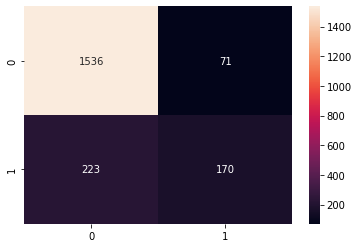

In [98]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt='d')